## Viewing Results

In [154]:
import os
import scanpy as sc

home = '/home/kojo/Code/Alz_trVAE'
os.chdir(home)

In [155]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from scipy import sparse
from scipy import stats
from matplotlib import pyplot as plt
import reptrvae

In [156]:
sc.set_figure_params(dpi=200)

In [157]:
path_to_save = "./results/alzPro/"
sc.settings.figdir = path_to_save

In [158]:
combination = 'U'
normalized = True
specific_cell_type = "all"

In [159]:
conditions = ["WT", "HET"]
source_condition = "WT"
target_condition = "HET"
cell_type_key = "Timepoint"
condition_key = "Group"

In [160]:
adata = sc.read(f"./data/alzPro_{'normalized' if normalized else 'count'}_{combination}.h5ad")
#adata.uns['log1p']["base"] = None
adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [161]:
adata.X.min(), adata.X.max()

(0.0, 55.11332)

In [162]:
if specific_cell_type != 'all':
    cell_type_adata = adata[adata.obs[cell_type_key] == specific_cell_type]
else:
    cell_type_adata = adata
#cell_type_adata.uns['log1p']["base"] = None
cell_type_adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [163]:
cell_type_adata.X[0][1550]

0.076606765

In [164]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == source_condition]
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]

In [165]:
ctrl_adata.obs['method'] = source_condition
real_adata.obs['method'] = target_condition

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


In [166]:
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPro/{specific_cell_type}_{'norm' if normalized else 'count'}_{combination}.h5ad")
#trvae_reconstructed.uns['log1p']["base"] = None
trvae_reconstructed

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [167]:
trvae_reconstructed.X[0][1550]

0.0

In [168]:
trvae_reconstructed.X[:8].min(), trvae_reconstructed.X[:8].max()

(0.0, 35.73342)

In [169]:
trvae_reconstructed.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
8-0,3346,F,WT_to_HET,all,Test,0
9-0,3347,F,WT_to_HET,all,Train,0
10-0,3388,F,WT_to_HET,all,Train,0
11-0,3389,F,WT_to_HET,all,Train,0
12-0,3606,M,WT_to_HET,all,Test,0
13-0,3607,M,WT_to_HET,all,Train,0
14-0,3608,M,WT_to_HET,all,Train,0
15-0,3609,M,WT_to_HET,all,Train,0
18-0,3003,F,WT_to_HET,all,Test,0
25-0,3392,M,WT_to_HET,all,Test,0


In [170]:
trvae_pred = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == f"{source_condition}_to_{target_condition}"]
trvae_pred.var = ctrl_adata.var
trvae_pred.obs['method'] = 'trVAE'

In [171]:
trvae_pred.obs

,Qi ID,sex,Group,Timepoint,Validation,batch,method
8-0,3346,F,WT_to_HET,all,Test,0,trVAE
9-0,3347,F,WT_to_HET,all,Train,0,trVAE
10-0,3388,F,WT_to_HET,all,Train,0,trVAE
11-0,3389,F,WT_to_HET,all,Train,0,trVAE
12-0,3606,M,WT_to_HET,all,Test,0,trVAE
13-0,3607,M,WT_to_HET,all,Train,0,trVAE
14-0,3608,M,WT_to_HET,all,Train,0,trVAE
15-0,3609,M,WT_to_HET,all,Train,0,trVAE
18-0,3003,F,WT_to_HET,all,Test,0,trVAE
25-0,3392,M,WT_to_HET,all,Test,0,trVAE


In [172]:
models = ctrl_adata.concatenate(real_adata, trvae_pred)
models.obs['method'].unique()

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


array(['WT', 'HET', 'trVAE'], dtype=object)

In [173]:
models.var_names

Index(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', 'A2A7S8|K1522',
       'A2A8L1|CHD5', 'A2A8L5|PTPRF', 'A2ADY9|DDI2', 'A2AG50|MA7D2',
       'A2AGT5|CKAP5', 'A2AJA9|AJM1',
       ...
       'Q9Z2U0|PSA7', 'Q9Z2U1|PSA5', 'Q9Z2U2|ZN292', 'Q9Z2V5|HDAC6',
       'Q9Z2W0|DNPEP', 'Q9Z2W8|GRIA4', 'Q9Z2W9|GRIA3', 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'],
      dtype='object', name='Accession', length=2969)

In [174]:
sc.tl.rank_genes_groups(models, reference=target_condition, 
                       groupby="method", groups=['trVAE'],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(models, reference='trVAE',
                         groupby="method", groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = models.uns['up_reg_genes']['names']['trVAE']
down_genes = models.uns['down_reg_genes']['names'][target_condition]

In [175]:
models.obs

,Qi ID,sex,Group,Timepoint,Validation,method,batch
8-0,3346,F,WT,3m,Test,WT,0
9-0,3347,F,WT,3m,Train,WT,0
10-0,3388,F,WT,3m,Train,WT,0
11-0,3389,F,WT,3m,Train,WT,0
12-0,3606,M,WT,3m,Test,WT,0
...,...,...,...,...,...,...,...
39-0-2,2227,F,WT_to_HET,all,Test,trVAE,2
40-0-2,2228,F,WT_to_HET,all,Train,trVAE,2
44-0-2,2583,F,WT_to_HET,all,Train,trVAE,2
46-0-2,3207,F,WT_to_HET,all,Train,trVAE,2


In [176]:
protein_up = up_genes[0]
print(protein_up)

Q925N0|SFXN5


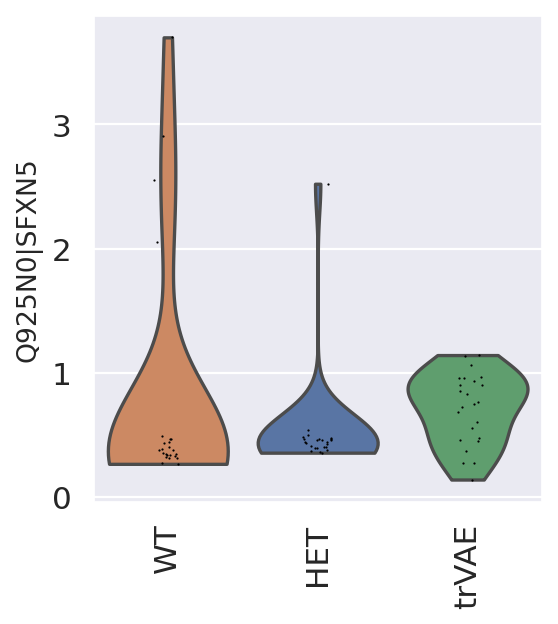

In [177]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_best_model_cmpr.pdf",
             jitter=True,
            )

In [178]:
protein_down = down_genes[0]
print(protein_down)

Q6R0H7|GNAS1


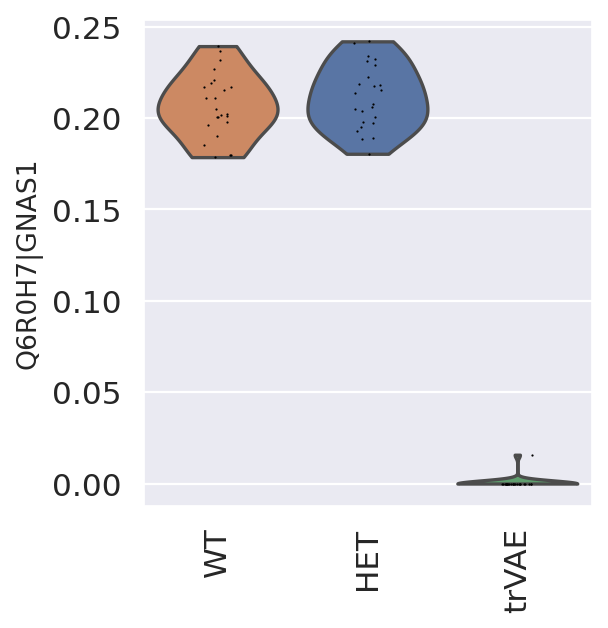

In [179]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_worst_model_cmpr.pdf",
             jitter=True,
            )

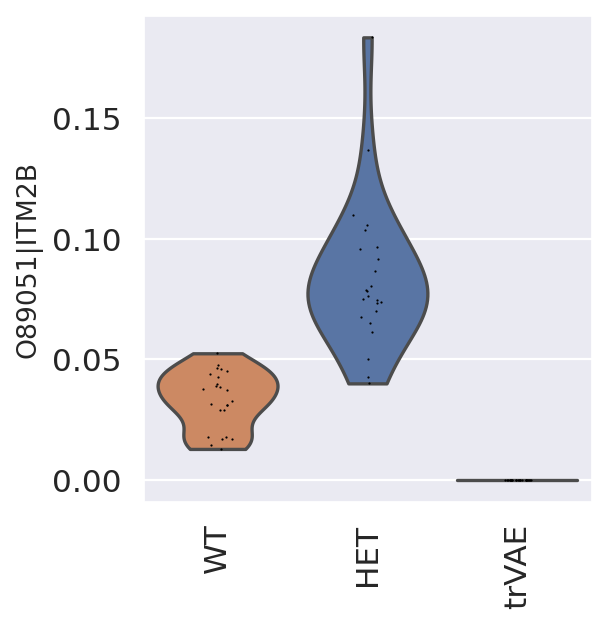

In [180]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="O89051|ITM2B", 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_model_cmpr.pdf",
             jitter=True,
            )

### R^2 Plots

In [181]:
adata_pred = ctrl_adata.concatenate(real_adata, trvae_pred)
#adata_pred.uns['log1p']["base"] = None
adata_pred

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 72 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'method', 'batch'

In [182]:
adata_pred.obs[condition_key].unique()

array(['WT', 'HET', 'WT_to_HET'], dtype=object)

In [183]:
#"""
sc.tl.rank_genes_groups(cell_type_adata, reference=target_condition, 
                       groupby=condition_key, groups=[source_condition],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(cell_type_adata, reference=source_condition,
                         groupby=condition_key, groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = cell_type_adata.uns['up_reg_genes']['names'][source_condition]
down_genes = cell_type_adata.uns['down_reg_genes']['names'][target_condition]
#"""

In [184]:
up_genes_pairs = {}
for i in range(50):
    up_genes_pairs[cell_type_adata.uns['up_reg_genes']['names'][source_condition][i]] = cell_type_adata.uns['up_reg_genes']['scores'][source_condition][i]
up_genes_pairs

{'Q7TME0|PLPR4': 3.782634,
 'P46460|NSF': 3.4669538,
 'Q8CFV4|NRN1': 3.3769138,
 'Q91XV3|BASP1': 3.3164349,
 'P61226|RAP2B': 3.2808723,
 'P63328|PP2BA': 3.2567918,
 'Q80ZJ1|RAP2A': 3.2466395,
 'Q5PR73|DIRA2': 3.2249107,
 'Q8K596|NAC2': 3.102059,
 'Q8BLQ9|CADM2': 3.0739772,
 'Q9WV69|DEMA': 2.890808,
 'Q3UVX5|GRM5': 2.8790512,
 'P0C7L0|WIPF3': 2.8634446,
 'P01831|THY1': 2.8323815,
 'P68404|KPCB': 2.8294861,
 'Q61644|PACN1': 2.7827694,
 'Q9DBG3|AP2B1': 2.736452,
 'Q62188|DPYL3': 2.7270684,
 'O54983|CRYM': 2.7210793,
 'P61161|ARP2': 2.7046995,
 'P11627|L1CAM': 2.6932216,
 'Q6IRU5|CLCB': 2.6708908,
 'O88998|NOE1': 2.6548455,
 'P30275|KCRU': 2.6435158,
 'Q8R366|IGSF8': 2.6016903,
 'Q8CGM1|AGRB2': 2.5821586,
 'Q9Z1Q9|SYVC': 2.4945745,
 'Q7TQF7|AMPH': 2.4770825,
 'O70161|PI51C': 2.476457,
 'P17427|AP2A2': 2.458018,
 'Q9JKD3|SCAM5': 2.4413204,
 'P0C0A3|CHMP6': 2.431476,
 'Q61016|GBG7': 2.414959,
 'Q9D8W7|OCAD2': 2.4131958,
 'P18872|GNAO': 2.4083576,
 'Q9Z0P4|PALM': 2.4034615,
 'Q920I9|WDR7': 2.

In [185]:
down_genes_pairs = {}
for i in range(50):
    down_genes_pairs[cell_type_adata.uns['down_reg_genes']['names'][target_condition][i]] = cell_type_adata.uns['down_reg_genes']['scores'][target_condition][i]
down_genes_pairs

{'P10605|CATB': 9.018807,
 'P20060|HEXB': 8.7661915,
 'P08226|APOE': 8.316935,
 'P12023|A4': 7.6970363,
 'O89051|ITM2B': 7.6261907,
 'P52760|RIDA': 6.969239,
 'O08709|PRDX6': 6.715707,
 'P03995|GFAP': 6.704535,
 'P20152|VIME': 6.5924087,
 'Q06890|CLUS': 6.545843,
 'Q920E5|FPPS': 6.461173,
 'P18242|CATD': 6.206914,
 'P48036|ANXA5': 5.84979,
 'Q8CAY6|THIC': 5.6090255,
 'Q9Z239|PLM': 5.155398,
 'P52196|THTR': 5.028791,
 'P12025|MK': 4.946662,
 'P31786|ACBP': 4.879623,
 'P10649|GSTM1': 4.815213,
 'Q9ER58|TICN2': 4.8131423,
 'O35874|SATT': 4.7718115,
 'O88844|IDHC': 4.6900525,
 'P14106|C1QB': 4.679883,
 'Q9R118|HTRA1': 4.620189,
 'O35405|PLD3': 4.5968637,
 'Q9WUU7|CATZ': 4.4128723,
 'P29416|HEXA': 4.381791,
 'Q9DAW9|CNN3': 4.3706694,
 'Q9D1A2|CNDP2': 4.092454,
 'Q61207|SAP': 4.081246,
 'P08113|ENPL': 3.9999769,
 'Q3UGY8|BIG3': 3.9059632,
 'P57776|EF1D': 3.882697,
 'P17047|LAMP2': 3.6593769,
 'Q9JKR6|HYOU1': 3.5744615,
 'P98086|C1QA': 3.5324957,
 'Q91VK4|ITM2C': 3.5251253,
 'P09103|PDIA1': 3

In [186]:
top_genes = up_genes.tolist() + down_genes.tolist()

In [187]:
len(top_genes)

100

In [188]:
protein_up = up_genes[0]
print(protein_up)

Q7TME0|PLPR4


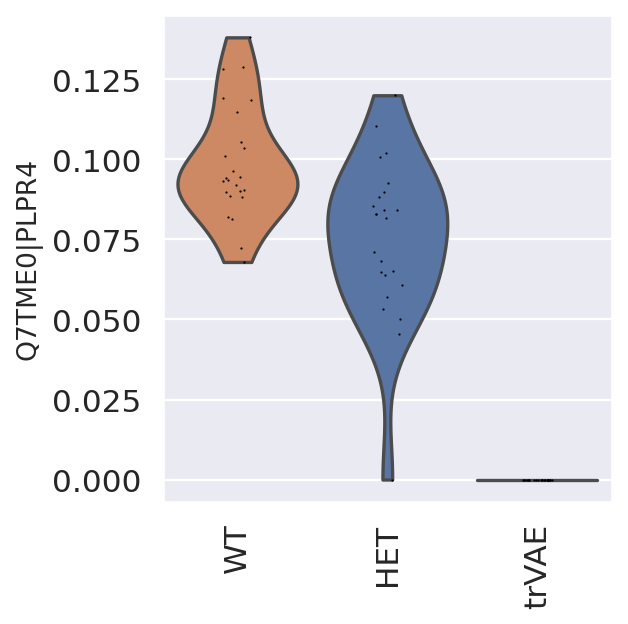

In [189]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_best_model_cmpr.pdf",
             jitter=True,
            )

In [190]:
protein_down = down_genes[0]
print(protein_down)

P10605|CATB


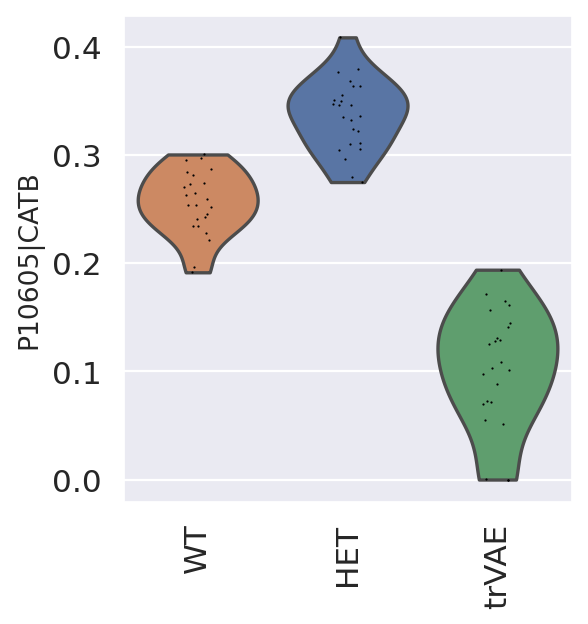

In [191]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_worst_model_cmpr.pdf",
             jitter=True,
            )

In [192]:
#top_genes = up_genes.tolist() + down_genes.tolist()

reg_mean_top100: 0.9166814635044522
reg_mean_all: 0.990290908815632


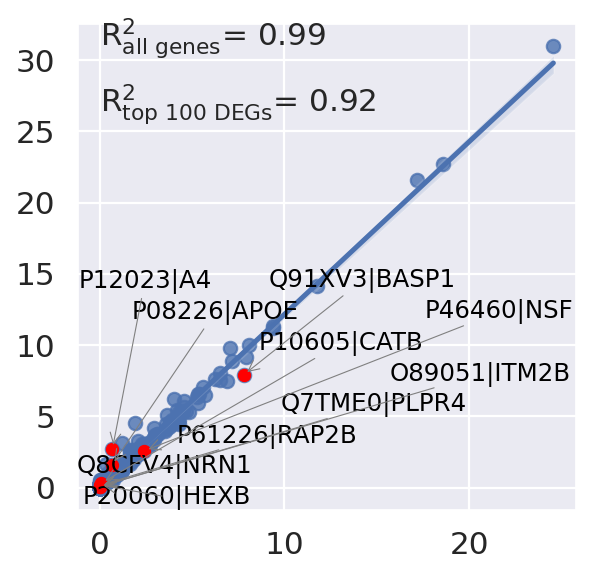

In [193]:
reptrvae.pl.reg_mean_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_{'normalized' if normalized else 'count'}_{combination}_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_top100: 0.8931512630961201
reg_var_all: 0.8461735901395715


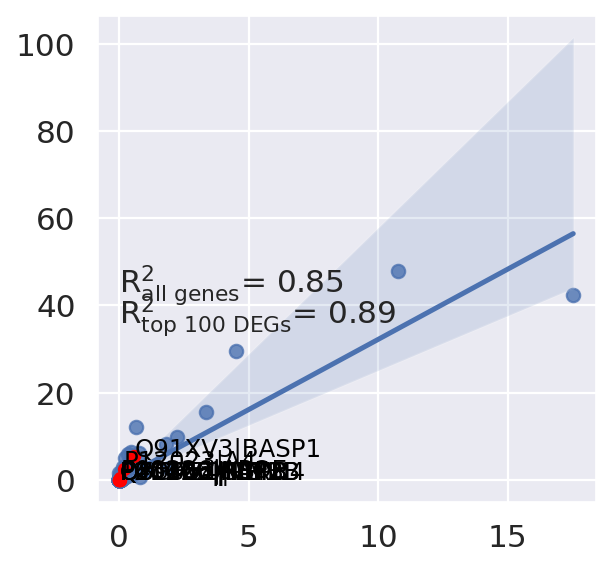

In [194]:
reptrvae.pl.reg_var_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_{'normalized' if normalized else 'count'}_{combination}_reg_var.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.1)

In [195]:
up_genes.tolist()

['Q7TME0|PLPR4',
 'P46460|NSF',
 'Q8CFV4|NRN1',
 'Q91XV3|BASP1',
 'P61226|RAP2B',
 'P63328|PP2BA',
 'Q80ZJ1|RAP2A',
 'Q5PR73|DIRA2',
 'Q8K596|NAC2',
 'Q8BLQ9|CADM2',
 'Q9WV69|DEMA',
 'Q3UVX5|GRM5',
 'P0C7L0|WIPF3',
 'P01831|THY1',
 'P68404|KPCB',
 'Q61644|PACN1',
 'Q9DBG3|AP2B1',
 'Q62188|DPYL3',
 'O54983|CRYM',
 'P61161|ARP2',
 'P11627|L1CAM',
 'Q6IRU5|CLCB',
 'O88998|NOE1',
 'P30275|KCRU',
 'Q8R366|IGSF8',
 'Q8CGM1|AGRB2',
 'Q9Z1Q9|SYVC',
 'Q7TQF7|AMPH',
 'O70161|PI51C',
 'P17427|AP2A2',
 'Q9JKD3|SCAM5',
 'P0C0A3|CHMP6',
 'Q61016|GBG7',
 'Q9D8W7|OCAD2',
 'P18872|GNAO',
 'Q9Z0P4|PALM',
 'Q920I9|WDR7',
 'Q8CAA7|PGM2L',
 'Q8BLK3|LSAMP',
 'Q8VDQ8|SIR2',
 'P04627|ARAF',
 'Q3UHL1|CAMKV',
 'Q9R1T4|SEPT6',
 'Q8VHW2|CCG8',
 'P63168|DYL1',
 'Q6PEB6|PHOCN',
 'P51655|GPC4',
 'Q9EQF6|DPYL5',
 'Q9JM76|ARPC3',
 'Q91V61|SFXN3']

In [196]:
down_genes.tolist()

['P10605|CATB',
 'P20060|HEXB',
 'P08226|APOE',
 'P12023|A4',
 'O89051|ITM2B',
 'P52760|RIDA',
 'O08709|PRDX6',
 'P03995|GFAP',
 'P20152|VIME',
 'Q06890|CLUS',
 'Q920E5|FPPS',
 'P18242|CATD',
 'P48036|ANXA5',
 'Q8CAY6|THIC',
 'Q9Z239|PLM',
 'P52196|THTR',
 'P12025|MK',
 'P31786|ACBP',
 'P10649|GSTM1',
 'Q9ER58|TICN2',
 'O35874|SATT',
 'O88844|IDHC',
 'P14106|C1QB',
 'Q9R118|HTRA1',
 'O35405|PLD3',
 'Q9WUU7|CATZ',
 'P29416|HEXA',
 'Q9DAW9|CNN3',
 'Q9D1A2|CNDP2',
 'Q61207|SAP',
 'P08113|ENPL',
 'Q3UGY8|BIG3',
 'P57776|EF1D',
 'P17047|LAMP2',
 'Q9JKR6|HYOU1',
 'P98086|C1QA',
 'Q91VK4|ITM2C',
 'P09103|PDIA1',
 'Q9CPY7|AMPL',
 'Q9QYM9|TEFF2',
 'P70441|NHRF1',
 'Q91V92|ACLY',
 'Q9EQH3|VPS35',
 'P01029|CO4B',
 'Q99JG2|ETBR2',
 'P05063|ALDOC',
 'Q62288|TICN1',
 'Q640R3|HECAM',
 'Q9CS84|NRX1A',
 'Q9CQ22|LTOR1']